# Project: Exploratory Data Analytics (EDA) for Heart Failure Dataset

In [180]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Reading and Loading the dateset into a DataFrame
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              918 non-null    int64  
 1   Sex              918 non-null    object 
 2   Chest_Pain_Type  918 non-null    object 
 3   Resting_BP       918 non-null    int64  
 4   Cholesterol      918 non-null    int64  
 5   Fasting_BS       918 non-null    int64  
 6   Resting_ECG      918 non-null    object 
 7   Max_HeartRate    918 non-null    int64  
 8   Exercise_Angina  918 non-null    object 
 9   Oldpeak          918 non-null    float64
 10  ST Slope         918 non-null    object 
 11  Heart_Disease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [172]:
df.shape

(918, 12)

In [12]:
# Change 1 and 0 from the HeartDisease to Sick and Healthy
df.loc[df['HeartDisease'] == 1, 'HeartDisease'] = 'Sick'
df.loc[df['HeartDisease'] == 0, 'HeartDisease'] = 'Healthy'

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,Healthy
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Sick
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,Healthy
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Sick
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,Healthy


In [14]:
# Change 1 and 0 from the HeartDisease to Male and Female
df.loc[df['Sex'] == 'M', 'Sex'] = 'male'
df.loc[df['Sex'] == 'F', 'Sex'] = 'female' 

In [17]:
df.loc[df['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 'Yes'
df.loc[df['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 'No'

In [19]:
df = df.rename(columns = {'ChestPainType':'Chest_Pain_Type', 
                          'RestingBP':'Resting_BP', 
                          'FastingBS':'Fasting_BS',
                          'RestingECG':'Resting_ECG',
                          'MaxHR':'Max_HeartRate',
                          'ExerciseAngina':'Exercise_Angina',
                          'ST_Slope':'ST Slope',
                          'HeartDisease':'Heart_Disease'})

In [20]:
df.head()

,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_HeartRate,Exercise_Angina,Oldpeak,ST Slope,Heart_Disease
0,40,male,ATA,140,289,0,Normal,172,No,0.0,Up,Healthy
1,49,female,NAP,160,180,0,Normal,156,No,1.0,Flat,Sick
2,37,male,ATA,130,283,0,ST,98,No,0.0,Up,Healthy
3,48,female,ASY,138,214,0,Normal,108,Yes,1.5,Flat,Sick
4,54,male,NAP,150,195,0,Normal,122,No,0.0,Up,Healthy


In the cell bellow I made two lists one for categorical variales and one for the numerical variables.

for efficient analysis

In [21]:
categorical_vars = []
numerical_vars = []

for col in list(df.columns):
    
    if ((df[col].dtype == 'float64') | (df[col].dtype == 'int64')) & (df[col].nunique() > 10):
        
        numerical_vars.append(col)
    
    else: categorical_vars.append(col)

In [26]:
categorical_vars.remove("Heart_Disease")

In [35]:
df[numerical_vars].describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.5,9.4,28.0,47.0,54.0,60.0,77.0
Resting_BP,918.0,132.4,18.5,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,198.8,109.4,0.0,173.2,223.0,267.0,603.0
Max_HeartRate,918.0,136.8,25.5,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.9,1.1,-2.6,0.0,0.6,1.5,6.2


# Exploring Data with some Visualizations

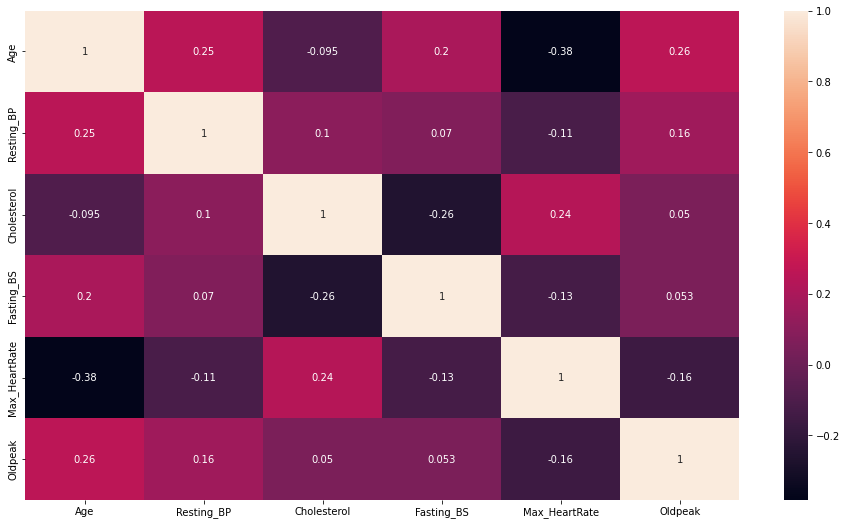

In [240]:
# HeatMap
plt.figure(figsize=(16,9))
x = df.drop(['Sex','Chest_Pain_Type','Resting_ECG','Exercise_Angina','ST Slope'],axis = 1)

ax = sns.heatmap(x.corr(),annot = True)
plt.show()

As we can see in the countplot below the male is significantly higher than the female

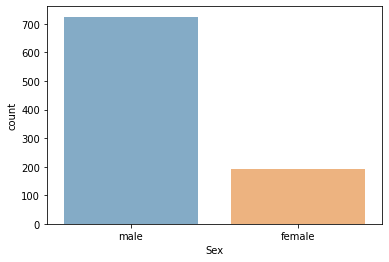

In [233]:
sns.countplot(x = df.Sex, alpha=0.6)
plt.show()

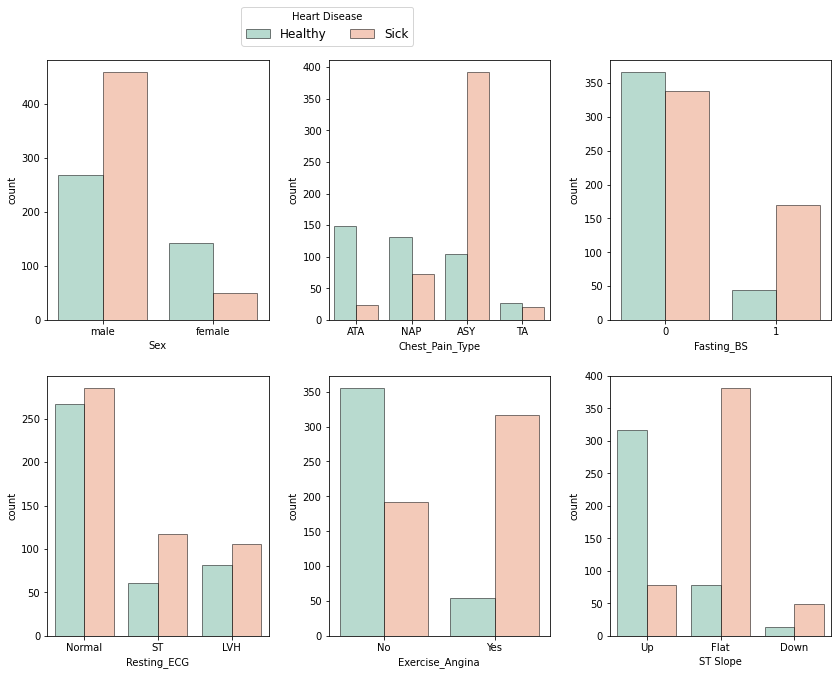

In [256]:
fig_1, ax_1 = plt.subplots(2, 3, figsize = (12, 9))

for idx, (column, axes) in list(enumerate(zip(categorical_vars, ax_1.flatten()))):

    count_plot = sns.countplot(ax        = axes, 
                               x         = df[column], 
                               hue       = df['Heart_Disease'], 
                               palette   = 'Set2', 
                               alpha     = 0.5, 
                               edgecolor = 'black')
    
    # we removed the legend from each plot because we added a Global Legend in the code below as you can see
    axes.get_legend().remove()

# added a global legend

handles, labels = axes.get_legend_handles_labels()
fig_1.legend(handles, labels, bbox_to_anchor = (0.5, 1.06), 
             ncol = 2, fontsize = 12,
             title = 'Heart Disease') 

plt.tight_layout(pad = 2)
plt.show()

In [250]:
df2 = df.groupby('Sex').agg(
    {'Age' : 'mean', 
     "Chest_Pain_Type":'count',
     'Resting_BP':'mean',
     'Cholesterol':'mean',
     'Fasting_BS':'sum',
     'Resting_ECG':'count',
     'Max_HeartRate':'mean',
     'Oldpeak':'mean',
    })

In [252]:
df2

,Age,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_HeartRate,Oldpeak
Sex,,,,,,,,
female,52.492228,193,132.212435,241.196891,26,193,146.139896,0.668912
male,53.782069,725,132.445517,187.513103,188,725,134.325517,0.945517


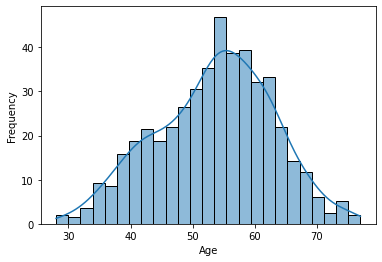

In [179]:
# The distribution of age comlumn in df
sns.histplot(df['Age'], kde=True,bins=25, stat='frequency');

In [219]:
df.sample(5)

,Age,Sex,Chest_Pain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_HeartRate,Exercise_Angina,Oldpeak,ST Slope,Heart_Disease
776,62,female,ASY,150,244,0,Normal,154,Yes,1.4,Flat,Sick
563,55,male,ASY,135,204,1,ST,126,Yes,1.1,Flat,Sick
466,55,male,NAP,120,0,0,ST,125,Yes,2.5,Flat,Sick
782,53,male,NAP,130,197,1,LVH,152,No,1.2,Down,Healthy
445,55,male,NAP,136,228,0,ST,124,Yes,1.6,Flat,Sick


In [241]:
Female_and_ChestPainType =  (df.Sex == "female") & (df.Heart_Disease == 'Healthy')
Male_and_ChestPainType =  (df.Sex == "male") & (df.Heart_Disease == 'Healthy')

# Patients who are healthy and female or male

In [242]:
print(f"The number of patients who are male and healthy is: {df[Male_and_ChestPainType].shape[0]}")
print(f"The number of patients who are female and healthy is: {df[Female_and_ChestPainType].shape[0]}")

The number of patients who are male and healthy is: 267
The number of patients who are female and healthy is: 143


In [259]:
ax_1

array([[<AxesSubplot:xlabel='Sex', ylabel='count'>,
        <AxesSubplot:xlabel='Chest_Pain_Type', ylabel='count'>,
        <AxesSubplot:xlabel='Fasting_BS', ylabel='count'>],
       [<AxesSubplot:xlabel='Resting_ECG', ylabel='count'>,
        <AxesSubplot:xlabel='Exercise_Angina', ylabel='count'>,
        <AxesSubplot:xlabel='ST Slope', ylabel='count'>]], dtype=object)